In [8]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

## Neural Network class and other functions

In [49]:
class NeuralNetwork:
    
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        
        model = {} # Dictionary
        
        # First Layer
        model['w1'] = np.random.randn(input_size, layers[0]) # randn to generate random weights from a normal distribution
        model['b1'] = np.zeros((1, layers[0]))
        
        # Second Layer
        model['w2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))
        
        # Third/Output Layer
        model['w3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self, x):
        
        w1, w2, w3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(x, w1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, w2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, w3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1, a2, y_)
        return y_
        
    def backward(self, x, y, learning_rate=0.001):
        
        w1, w2, w3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]
        a1, a2, y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3, w3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2, w2.T)
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis=0)
        
        # Update the model parameters
        self.model["w1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        
        self.model["w2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["w3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
        
    def predict(self, x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)
    
    def summary(self):
        
        w1, w2, w3 = self.model['w1'], self.model['w2'], self.model['w3']
        a1, a2, y_ = self.activation_outputs
        
        print("w1", w1.shape)
        print("a1", a1.shape)
        
        print("w2", w2.shape)
        print("a2", a2.shape)
        
        print("w3", w3.shape)
        print("y_", y_.shape)
        

In [50]:
def softmax(a):
    e_pa = np.exp(a) # Vector if 'a' is vector
    ans = e_pa/np.sum(e_pa, axis=1, keepdims=True)
    return ans

def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

def train(x, y, model, epochs, learning_rate, logs=True):
    training_loss = []
    
    classes = 2
    y_oht = one_hot(y, classes)
    
    for ix in range(epochs):
        
        y_ = model.forward(x)
        l = loss(y_oht, y_)
        training_loss.append(l)
        model.backward(x, y_oht, learning_rate)
        
        if logs and ix%50 == 0:
            print("Epoch %d Loss %.4f"%(ix, l))
    
    return training_loss

## Data Generation

In [51]:
x, y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

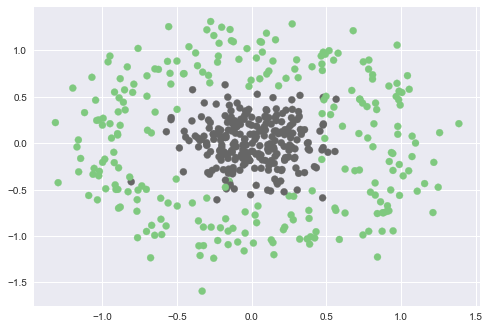

In [52]:
plt.style.use('seaborn')
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.Accent)
plt.show()

## Training our model

In [56]:
# Model Prameters
input_size = 2 # no of features
layers = [4, 3] # no of neurons in 1st and 2nd layer
output_size = 2

model = NeuralNetwork(input_size=2, layers=[10,5],output_size=2)

In [57]:
losses = train(x, y, model, 1000, 0.001)

Epoch 0 Loss 0.3571
Epoch 50 Loss 0.0711
Epoch 100 Loss 0.0542
Epoch 150 Loss 0.0484
Epoch 200 Loss 0.0454
Epoch 250 Loss 0.0436
Epoch 300 Loss 0.0423
Epoch 350 Loss 0.0413
Epoch 400 Loss 0.0406
Epoch 450 Loss 0.0399
Epoch 500 Loss 0.0394
Epoch 550 Loss 0.0389
Epoch 600 Loss 0.0385
Epoch 650 Loss 0.0381
Epoch 700 Loss 0.0377
Epoch 750 Loss 0.0374
Epoch 800 Loss 0.0371
Epoch 850 Loss 0.0369
Epoch 900 Loss 0.0366
Epoch 950 Loss 0.0364


## Loss and accuracy

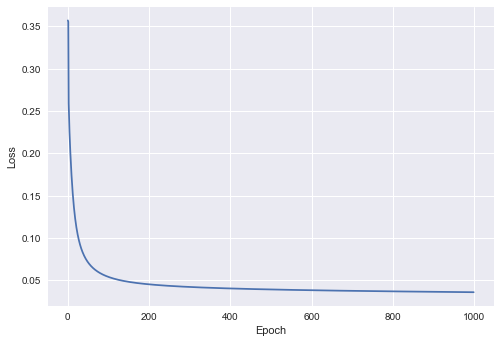

In [58]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [59]:
outputs = model.predict(x)
training_accuracy = np.sum(outputs==y)/y.shape[0]
print("Training accuracy %.4f"%training_accuracy)

Training accuracy 0.9700
